In [1]:
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adadelta
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Paths

In [2]:
#Ubuntu
#main_path_energy = "/home/sebastian/github/SpecialProblem_Salo/drone_irrigation_vrep/src/data_base/paths_energy/"
#main_path_total_energy = "/home/sebastian/github/SpecialProblem_Salo/drone_irrigation_vrep/src/data_base/paths_totals/"
#main_path_turns = "/home/sebastian/Desktop/"
#Windows
main_path_energy = r"C:\Users\SEBASTIAN\Documents\GitHub\problemaEspecialSalo\drone_irrigation\src\data_base\paths_energy/"
main_path_total_energy = r"C:\Users\SEBASTIAN\Documents\GitHub\problemaEspecialSalo\drone_irrigation\src\data_base\paths_totals/"

energy_path11_pd = pd.read_csv(main_path_energy + 'feat_pathv11_nuevo.csv')
energy_path12_pd = pd.read_csv(main_path_energy + 'feat_pathv12_nuevo.csv')
energy_path13_pd = pd.read_csv(main_path_energy + 'features_pathv13.csv')

energy_path_list = [energy_path11_pd,energy_path12_pd,energy_path13_pd]
complete_energy_pd = pd.concat(energy_path_list)

total_path11_pd = pd.read_csv(main_path_total_energy + 'totalF_pathv11.csv')
total_path12_pd = pd.read_csv(main_path_total_energy + 'totalF_pathv12_nuevo.csv')
total_path13_pd = pd.read_csv(main_path_total_energy + 'totals_pathv13.csv')

total_path_list = [total_path11_pd,total_path12_pd,total_path13_pd]
complete_total_pd = pd.concat(total_path_list)

### Data split and preprocessing - complete_energy_pd - All data

this data comes from the folder "paths_energy"

In [3]:
X = complete_energy_pd.drop(columns=["missing_points","path_num","sim_drone_time","Energy","sim_point_dist","sim_Xdist","sim_Ydist","avg_error_target_dist","avg_energy"],axis=1)
y = complete_energy_pd["Energy"].to_numpy()

X = X.to_numpy()

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=35)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(f'Train size/Test size {len(x_train),len(x_test)}')

Train size/Test size (2486, 622)


### Model - Neural network - relu and linear

In [30]:
NN_model = Sequential()

NN_model.add(Dense(128,kernel_initializer='normal',input_dim=5,activation='relu'))

NN_model.add(Dense(128,kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256,kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256,kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128,kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss="mean_squared_logarithmic_error", optimizer=Adam(learning_rate=0.001), metrics=["mean_squared_logarithmic_error"])
NN_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 128)               768       
_________________________________________________________________
dense_49 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_50 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_51 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_52 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 129       
Total params: 149,121
Trainable params: 149,121
Non-trainable params: 0
________________________________________________

In [ ]:
#checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
#path_weigths = r"C:\Users\SEBASTIAN\OneDrive - Universidad de los Andes\OctavoSemestre\ProblemaEspecial\ML\ModelosNN2/" 
#final_path = path_weigths+checkpoint_name
#checkpoint = ModelCheckpoint(final_path, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
#reduceLR = ReduceLROnPlateau()
#callbacks_list = [checkpoint,reduceLR]

In [31]:
#NN_model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)
model1 = NN_model.fit(x_train, y_train, epochs=250, batch_size=32, validation_split = 0.2)

Epoch 1/250
63/63 [==============================] - 1s 12ms/step - loss: 158.9368 - mean_squared_logarithmic_error: 158.9368 - val_loss: 41.7792 - val_mean_squared_logarithmic_error: 41.7792
Epoch 2/250
63/63 [==============================] - 1s 10ms/step - loss: 33.3572 - mean_squared_logarithmic_error: 33.3572 - val_loss: 17.8796 - val_mean_squared_logarithmic_error: 17.8796
Epoch 3/250
63/63 [==============================] - 1s 9ms/step - loss: 15.2033 - mean_squared_logarithmic_error: 15.2033 - val_loss: 9.5251 - val_mean_squared_logarithmic_error: 9.5251
Epoch 4/250
63/63 [==============================] - 1s 9ms/step - loss: 8.2673 - mean_squared_logarithmic_error: 8.2673 - val_loss: 5.3651 - val_mean_squared_logarithmic_error: 5.3651
Epoch 5/250
63/63 [==============================] - 1s 9ms/step - loss: 4.6245 - mean_squared_logarithmic_error: 4.6245 - val_loss: 3.1253 - val_mean_squared_logarithmic_error: 3.1253
Epoch 6/250
63/63 [==============================] - 1s 10ms/

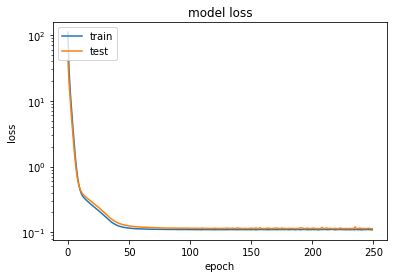

In [32]:
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.yscale("log")
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
y_predict = NN_model.predict(x_test)
r2 = r2_score(y_test,y_predict)
RMSE = mean_squared_error(y_test,y_predict,squared=False)
MSE = mean_squared_error(y_test,y_predict)

print(f'r2: {r2}')
print(f'RMSE: {RMSE}')
print(f'MSE: {MSE}')

r2: 0.6527872932401786
RMSE: 1127332.1832390686
MSE: 1270877851366.5647


### Data split and preprocessing - complete_energy_pd - with eps

In [3]:
eps = 5
complete_energy_pd = complete_energy_pd[(complete_energy_pd['sim_point_dist']-complete_energy_pd['teo_point_dist']) < eps]
print(f'new shape of complete_energy_pd = {complete_energy_pd.shape}')

new shape of complete_energy_pd = (2577, 14)


In [4]:
X = complete_energy_pd.drop(columns=["missing_points","path_num","sim_drone_time","Energy","sim_point_dist","sim_Xdist","sim_Ydist","avg_error_target_dist","avg_energy"],axis=1)
y = complete_energy_pd["Energy"].to_numpy()

X = X.to_numpy()

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=35)

scaler2 = StandardScaler()

x_train = scaler2.fit_transform(x_train)
x_test = scaler2.transform(x_test)

print(f'Train size/Test size {len(x_train),len(x_test)}')

Train size/Test size (2061, 516)


In [25]:
NN_model11 = Sequential()

ran_initial = RandomNormal(seed=35)

NN_model11.add(Dense(64,kernel_initializer=ran_initial,input_dim=5,activation='relu'))

NN_model11.add(Dense(128,kernel_initializer=ran_initial,activation='relu'))
NN_model11.add(Dense(128,kernel_initializer=ran_initial,activation='relu'))
NN_model11.add(Dense(128,kernel_initializer=ran_initial,activation='relu'))
NN_model11.add(Dense(128,kernel_initializer=ran_initial,activation='relu'))

NN_model11.add(Dense(1, kernel_initializer=ran_initial,activation='linear'))

NN_model11.compile(loss="mean_squared_logarithmic_error", optimizer=Adadelta(learning_rate=0.2), metrics=["mean_squared_logarithmic_error"])

In [26]:
model11 = NN_model11.fit(x_train, y_train, epochs=350, batch_size=32, validation_split = 0.2,verbose=0)

Epoch 1/350
52/52 [==============================] - 1s 10ms/step - loss: 178.7713 - mean_squared_logarithmic_error: 178.7713 - val_loss: 48.5012 - val_mean_squared_logarithmic_error: 48.5012
Epoch 2/350
52/52 [==============================] - 0s 7ms/step - loss: 38.4075 - mean_squared_logarithmic_error: 38.4075 - val_loss: 21.5813 - val_mean_squared_logarithmic_error: 21.5813
Epoch 3/350
52/52 [==============================] - 0s 7ms/step - loss: 18.6532 - mean_squared_logarithmic_error: 18.6532 - val_loss: 12.6117 - val_mean_squared_logarithmic_error: 12.6117
Epoch 4/350
52/52 [==============================] - 0s 9ms/step - loss: 11.3436 - mean_squared_logarithmic_error: 11.3436 - val_loss: 8.0972 - val_mean_squared_logarithmic_error: 8.0972
Epoch 5/350
52/52 [==============================] - 0s 9ms/step - loss: 7.2527 - mean_squared_logarithmic_error: 7.2527 - val_loss: 5.4389 - val_mean_squared_logarithmic_error: 5.4389
Epoch 6/350
52/52 [==============================] - 1s 10

In [27]:
y_predict = NN_model11.predict(x_test)
r2 = r2_score(y_test,y_predict)
RMSE = mean_squared_error(y_test,y_predict,squared=False)
MSE = mean_squared_error(y_test,y_predict)

print(f'r2: {r2}')
print(f'RMSE: {RMSE}')
print(f'MSE: {MSE}')

r2: 0.736614260356993
RMSE: 734746.9360115259
MSE: 539853059978.3254


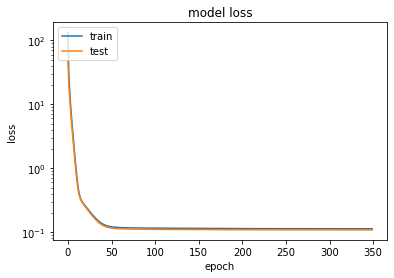

In [28]:
plt.plot(model11.history['loss'])
plt.plot(model11.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.yscale("log")
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model - Neural network - sigmoid and linear

In [29]:
NN_model2 = Sequential()

NN_model2.add(Dense(128,kernel_initializer='normal',input_dim=5,activation='sigmoid'))

NN_model2.add(Dense(128,kernel_initializer='normal',activation='sigmoid'))
NN_model2.add(Dense(128,kernel_initializer='normal',activation='sigmoid'))
NN_model2.add(Dense(128,kernel_initializer='normal',activation='sigmoid'))
NN_model2.add(Dense(128,kernel_initializer='normal',activation='sigmoid'))

NN_model2.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model2.compile(loss="mean_squared_logarithmic_error", optimizer=Adadelta(learning_rate=0.1), metrics=["mean_squared_logarithmic_error"])
NN_model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               768       
_________________________________________________________________
dense_37 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_38 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_39 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_40 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 129       
Total params: 66,945
Trainable params: 66,945
Non-trainable params: 0
__________________________________________________

In [30]:
model2 = NN_model2.fit(x_train, y_train, epochs=350, batch_size=32, validation_split = 0.2,verbose=0)

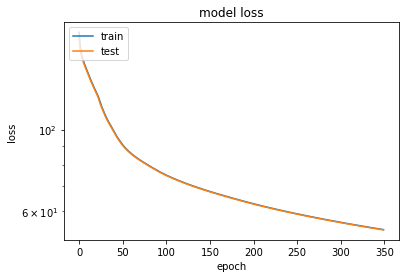

In [31]:
plt.plot(model2.history['loss'])
plt.plot(model2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.yscale("log")
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
y_predict = NN_model2.predict(x_test)
r2 = r2_score(y_test,y_predict)
RMSE = mean_squared_error(y_test,y_predict,squared=False)
MSE = mean_squared_error(y_test,y_predict)

print(f'r2: {r2}')
print(f'RMSE: {RMSE}')
print(f'MSE: {MSE}')

r2: -1.6539289007008686
RMSE: 2332310.120849279
MSE: 5439670499815.979
